# $2^{nd}$ exercise

## Notebook setup

#### Used libraries

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#### Reading and printing config files

In [4]:
def LoadConfig(path):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = int(val)
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))

#### Colors, just for fun

In [5]:
bgp = "#191724"
txt = "#e0def4"
err = "#908caa"
er2 = "#6e6a86"
lmn = "#eb6f92"

## 02.1 - Integrals

**Goal:** to test the pseudo-random number generator in `lib/Random`, which basic function is to exctract a uniformly a number $r\in[0,1)$. To do so, we are going to evaluate the mean $\langle r \rangle$ and the variance $\sigma^2$, and to implement the $\chi^2$ test.

**Expectations:**  <br>
- Mean: $\langle r\rangle=\int_0^1\mathrm{d}r\,r=0.5$; <br>
- Variance: $\sigma^2=\int_0^1\mathrm{d}r\,(r-0.5)^2=0.08\overline{3}$.
 
**Methodological notes:** We use the datablocking method to evaluate statistical uncertainties for $\langle r\rangle,\,\sigma^2$.

###  Parameters
For mean and variance evaluations we divided the estimation in `N_BLOCKS` blocks with `STEPS_PER_BLOCK` steps each - 
with:

In [6]:
c1=LoadConfig("in/021-conf.inl")
PrintConf(c1)

N_BLOCKS           100
STEPS_PER_BLOCK    1000


### Results
#### Mean

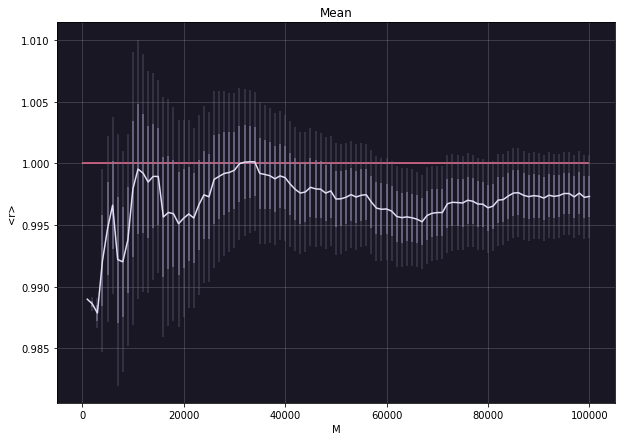

In [7]:
data = np.genfromtxt("out/021-progressive_averages_average.csv", delimiter=",", skip_header=1)
data[:,0]*=c1['STEPS_PER_BLOCK']

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.hlines(1, 0, c1['STEPS_PER_BLOCK']*c1["N_BLOCKS"],color=lmn)

plt.vlines(data[:,0],-data[:,4]+data[:,3],data[:,4]+data[:,3],color=err,alpha=0.8)
plt.vlines(data[:,0],-2*data[:,4]+data[:,3],2*data[:,4]+data[:,3],color=er2,alpha=0.4)
plt.errorbar(data[:,0],data[:,3],color=txt)
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean")
plt.grid(alpha=0.3)
plt.show()

#### Variance

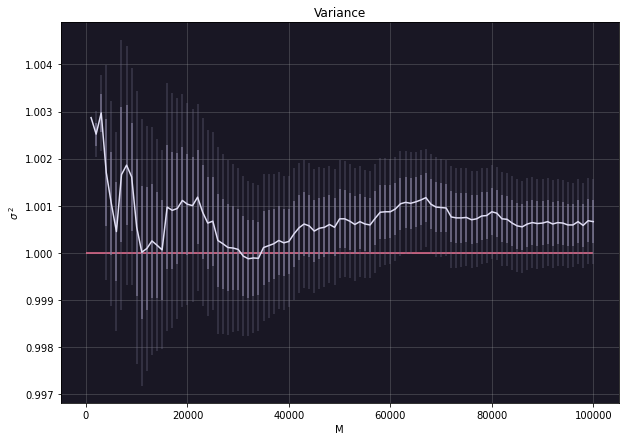

In [8]:
data = np.genfromtxt("out/021-progressive_averages_importance_o1.csv", delimiter=",", skip_header=1)
data[:,0]*=c1['STEPS_PER_BLOCK']

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.hlines(1, 0, c1['STEPS_PER_BLOCK']*c1["N_BLOCKS"],color=lmn)

plt.vlines(data[:,0],-data[:,4]+data[:,3],data[:,4]+data[:,3],color=err,alpha=0.8)
plt.vlines(data[:,0],-2*data[:,4]+data[:,3],2*data[:,4]+data[:,3],color=er2,alpha=0.4)
plt.errorbar(data[:,0],data[:,3],color=txt)
plt.xlabel('M')
plt.ylabel('$\sigma\,^2$')
plt.title("Variance")
plt.grid(alpha=0.3)
plt.show()

### Results
Mean and variance converge to the expected values and their uncertainties decreases by increasing the number of throws (COME DICO CHE SONO NEI 2 SIGMA?)

## 02.2 - Random walk

**Goal:** Extending the pseudo-random number generator introducing sampling from the exponential and the Cauchy-Lorentz distribution (using the method of the inverse cumulative distribution); Testing the central limit theorem (and it's generalized version) throwing a:
- Uniform dice
- Exponential dice ($\lambda=1$)
- Cauchy-Lorentz dice ($\mu=0$, $\Gamma=1$)

**Expectations:** We are going to plot the hystograms of the averages over $N$ throws of the dice. We expect that for large $N$ the hystograms obtained from the uniform and the exponential dices will be well fitted by a gaussian, while the lorentzian dice (having the distribution infinite variance) will be well fitted by a lorentzian. 

###  Parameters
The hystograms are made throwing the dices `THROWS` times - with:

In [25]:
c=LoadConfig("in/022-conf.inl")
PrintConf(c)

N_BLOCKS           100
RW_PER_BLOCK       1000
RW_STEPS           100
LATTICE_DIM        1


### Results
#### Discrete
To obtain a clear view of the convergence of the averages hystogram for increasing $N$ we divided $[1,6)$ into 100 subintervals instead of 6 subintervals of width 1. Thus, we are not properly simulating a dice. This is justified by the fact that the term "dice" is forced to be intended in somehow a broader meaning for the exponential and the lorentzian dices, since their values is taken in an infinite interval.

<Figure size 1080x936 with 0 Axes>

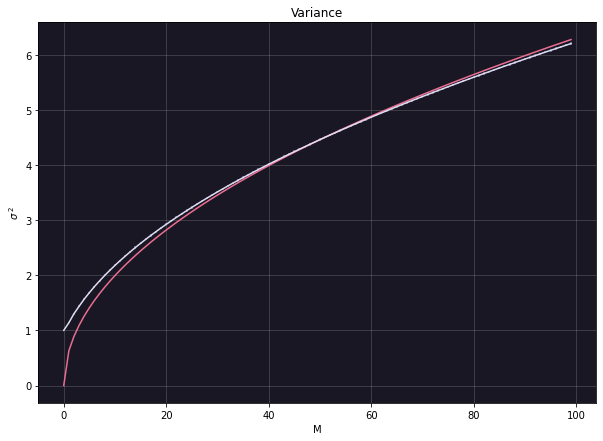

In [21]:
fig=plt.figure(figsize=(15, 13))
data = np.genfromtxt("out/022-discreterw.csv", delimiter=",", skip_header=1)
xs=data[:,0];
ys=data[:,1];
errs=data[:,2];

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.vlines(xs,-errs+ys,errs+ys,color=err,alpha=0.8)
plt.errorbar(xs,ys,color=txt)

def f (x, k):
    return k * np.sqrt(x)
popt, pcov = curve_fit(f, xs, ys)
plt.plot(blk,f(blk,*popt), color=lmn, label='Fit')

plt.xlabel('M')
plt.ylabel('$\sigma\,^2$')
plt.title("Variance")
plt.grid(alpha=0.3)
plt.show()

#### Continuous

<Figure size 1080x936 with 0 Axes>

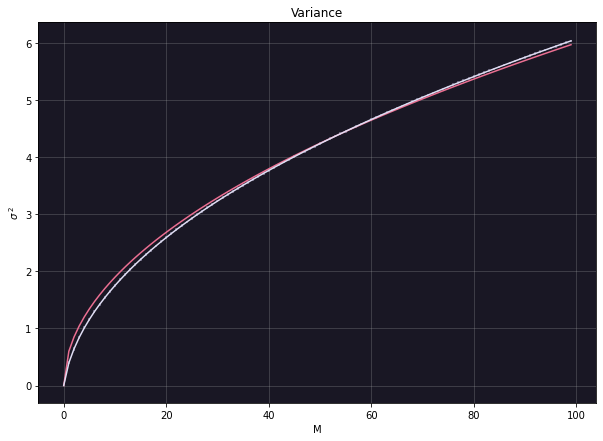

In [23]:
fig=plt.figure(figsize=(15, 13))
data = np.genfromtxt("out/022-continuousrw.csv", delimiter=",", skip_header=1)
xs=data[:,0];
ys=data[:,1];
errs=data[:,2];

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.vlines(xs,-errs+ys,errs+ys,color=err,alpha=0.8)
plt.errorbar(xs,ys,color=txt)

def f (x, k):
    return k * np.sqrt(x)
popt, pcov = curve_fit(f, xs, ys)
plt.plot(blk,f(blk,*popt), color=lmn, label='Fit')

plt.xlabel('M')
plt.ylabel('$\sigma\,^2$')
plt.title("Variance")
plt.grid(alpha=0.3)
plt.show()

### Conclusion